In [1]:
import matplotlib.pyplot as plt
import os
height = 10
width = height*0.6
plt.rcParams["figure.figsize"] = (height,width)
import numpy as np
plt.style.use('seaborn-colorblind')

Dataset = "CIFAR10/"
# Dataset = "CIFAR100/"
# Dataset = "MNIST/"

model = "BranchedMobileNet"

figure_directory = "../trained-models/"+model+"/"+Dataset

try:
    os.mkdir(figure_directory + 'figures/')
    print('Figure Folder Created..')
except FileExistsError:
    print('Figure Folder Exists..')
        

Figure Folder Exists..


In [16]:
branch_train_accuracies = []
branch_val_accuracies = []
branch_train_losses = []
branch_val_losses = [] 
train_losses = [] 
val_losses = [] 
branch_weights = []
checkpoint_metrics = []

# runs = ['run5','w001','w002','w003','w005','w010','w015','w020','run6','run7','run9','w080','w085','w090','w095','w097','w098','w099','run10']
runs = ['ptr_wb102','ptr_wb104','ptr_wb106','ptr_wb108']
runs = ["CA-lr-wb101-b202-b303","wb102-b202-b302","b102-b201-b303","CA-lr-wb102-b203-b301"] 

branch_weights = np.load(figure_directory+runs[0]+"/metrics/branch-weights-"+model+".npy")

for run in runs:
    target_directory = figure_directory+run+"/metrics/"

    branch_train_accuracies.append(np.load(target_directory+"branch-train-accuracies-"+model+".npy"))
    branch_val_accuracies.append(np.load(target_directory+"branch-val-accuracies-"+model+".npy"))
    branch_train_losses.append(np.load(target_directory+"branch-train-losses-"+model+".npy"))
    branch_val_losses.append(np.load(target_directory+"branch-val-losses-"+model+".npy"))

    train_losses.append(np.load(target_directory+"train-losses-"+model+".npy"))
    val_losses.append(np.load(target_directory+"val-losses-"+model+".npy"))
    checkpoint_metrics.append(np.load(target_directory+"checkpoint-metrics-"+model+".npy"))
    branch_weights = np.vstack((branch_weights,np.load(target_directory+"branch-weights-"+model+".npy")))

branch_weights = branch_weights[1:]

final_accuracies = branch_val_accuracies[0][:,:,-1]
for i in range(1,len(branch_val_accuracies)):
    final_accuracies = np.dstack((final_accuracies,branch_val_accuracies[i][:,:,-1]))

In [8]:
print(val_losses[1].shape)
print(train_losses[1].shape)

print(branch_train_accuracies[1].shape)
print(branch_val_accuracies[1].shape)
print(branch_train_losses[1].shape)
print(branch_val_losses[1].shape)

print(branch_weights.shape)

print(checkpoint_metrics[1].shape)

(3, 100)
(3, 100)
(3, 4, 100)
(3, 4, 100)
(3, 4, 100)
(3, 4, 100)
(4, 4)
(3, 3)


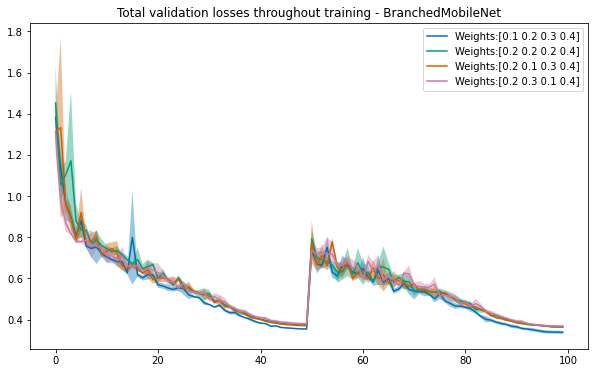

In [17]:
plt.title("Total validation losses throughout training - "+model)
for i in range(len(runs)):
    plt.plot(np.arange(0,val_losses[i].shape[1]), np.mean(val_losses[i],axis=0),label=("Weights:"+str(branch_weights[i])))
    plt.fill_between(np.arange(0,val_losses[i].shape[1]), np.mean(val_losses[i],axis=0)+np.std(val_losses[i],axis=0), np.mean(val_losses[i],axis=0)-np.std(val_losses[i],axis=0),alpha=0.4)
plt.legend()
plt.savefig(figure_directory+'figures/pretrained-total-model-loss.pdf', bbox_inches = 'tight')
plt.show()

0.9068509340286255
0.8989382982254028
0.9024438858032227
0.8983373641967773


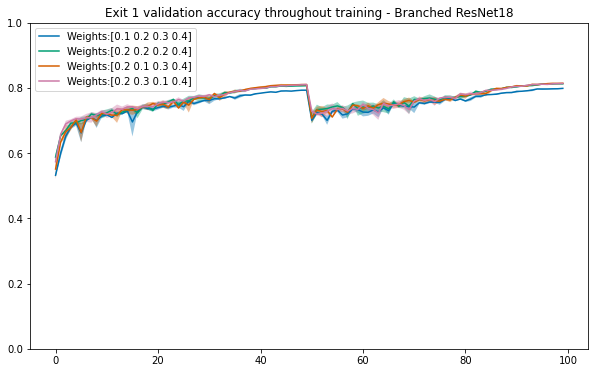

0.9068509340286255
0.8989382982254028
0.9024438858032227
0.8983373641967773


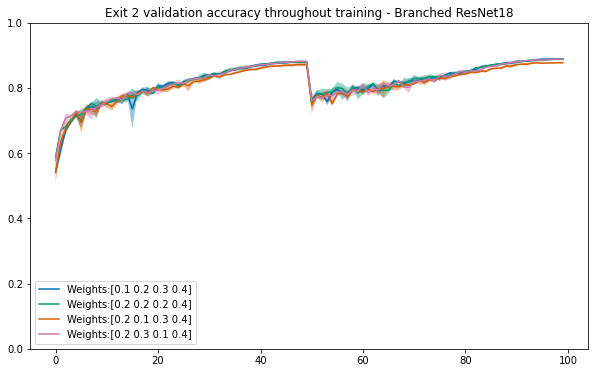

0.9068509340286255
0.8989382982254028
0.9024438858032227
0.8983373641967773


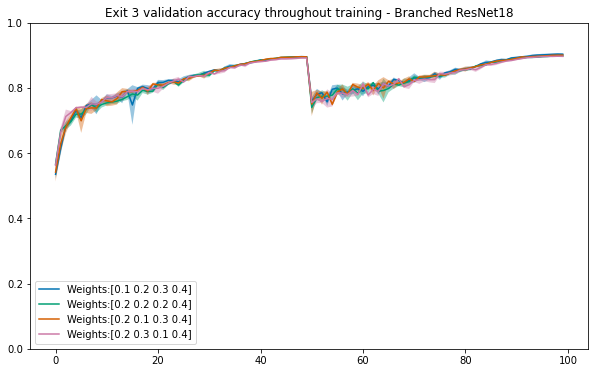

0.9068509340286255
0.8989382982254028
0.9024438858032227
0.8983373641967773


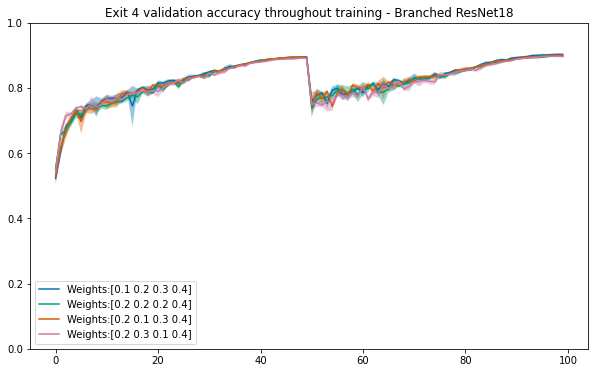

In [19]:
for exit in range(4):
    plt.title("Exit "+str(exit+1) +" validation accuracy throughout training - Branched ResNet18")
    for i in range(len(runs)):
        plt.plot(np.arange(0,val_losses[i].shape[1]), np.mean(branch_val_accuracies[i][:,exit,:],axis=0),label=("Weights:"+str(branch_weights[i])))
        plt.fill_between(np.arange(0,val_losses[i].shape[1]), np.mean(branch_val_accuracies[i][:,exit,:],axis=0)+np.std(branch_val_accuracies[i][:,exit,:],axis=0), np.mean(branch_val_accuracies[i][:,exit,:],axis=0)-np.std(branch_val_accuracies[i][:,exit,:],axis=0),alpha=0.4)
        print(np.max(branch_val_accuracies[i][:,-1,:]))
    plt.ylim(0,1)
    plt.legend()
    plt.savefig(figure_directory+"figures/exit"+str(exit)+"-pretrained-accuracy-curves.pdf", bbox_inches = 'tight')
    plt.show()

(3, 4, 4)
(4, 4)


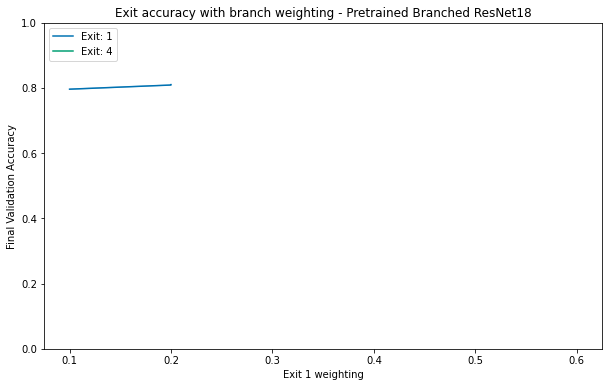

In [11]:
print(final_accuracies.shape)
print(branch_weights.shape)


plt.title("Exit accuracy with branch weighting - Pretrained Branched ResNet18")

exits = [0,3]

plt.plot(branch_weights[:,exits[0]],np.mean(final_accuracies[:,exits[0],:],axis=0),label="Exit: "+str(exits[0]+1))
plt.fill_between(branch_weights[:,exits[0]], np.mean(final_accuracies[:,exits[0],:],axis=0)+np.std(final_accuracies[:,exits[0],:],axis=0), np.mean(final_accuracies[:,exits[0],:],axis=0)-np.std(final_accuracies[:,exits[0],:],axis=0),alpha=0.4)

plt.plot(1-branch_weights[:,exits[1]],np.mean(final_accuracies[:,exits[1],:],axis=0),label="Exit: "+str(exits[1]+1))
plt.fill_between(1-branch_weights[:,exits[1]], np.mean(final_accuracies[:,exits[1],:],axis=0)+np.std(final_accuracies[:,exits[1],:],axis=0), np.mean(final_accuracies[:,exits[1],:],axis=0)-np.std(final_accuracies[:,exits[1],:],axis=0),alpha=0.4)

plt.ylim(0,1)
plt.xlabel("Exit 1 weighting")
plt.ylabel("Final Validation Accuracy")
plt.legend()
plt.savefig(figure_directory+"figures/pretrained-exit-accuracies.pdf", bbox_inches = 'tight')
plt.show()